In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from copy import deepcopy

In [49]:
class GameOfLife():
    def __init__(self, grid_shape):
        self.grid_shape = grid_shape
        self.grid = np.zeros(grid_shape)
    
    def random_init(self, p_alive=0.5):
        self.grid = np.random.choice(np.array([1, 0]), self.grid_shape, p=[p_alive, 1-p_alive])
        
    def update(self):
        max_x = self.grid_shape[0]
        max_y = self.grid_shape[1]
        old_grid = deepcopy(self.grid)
        for x in range(self.grid_shape[0]):
            for y in range(self.grid_shape[1]):
                low_x = x-1 if x > 0 else 0
                high_x = x+2 if x < max_x-1 else max_x
                low_y = y-1 if y > 0 else 0
                high_y = y+2 if y < max_y-1 else max_y
                n_neighbors = old_grid[low_x:high_x,low_y:high_y].sum() - old_grid[x,y]
                if old_grid[x,y] == 1:
                    if n_neighbors < 2 or n_neighbors > 3:
                        self.grid[x,y] = 0
                else:
                    if n_neighbors == 3:
                        self.grid[x,y] = 1

In [114]:
class PlanoAstral():
    def __init__(self):
        self.fixed_ps = [] # List of Tuples
        
    def random_init(self, num_points, rng_x, rng_y):
        for _ in range(num_points):
            self.fixed_ps.append((np.random.randint(rng_x[0], rng_x[1]), np.random.randint(rng_y[0], rng_y[1])))
        
    def update(self, grid_world):
        new_ps = []
        for p in self.fixed_ps:
            for off in [(1,0), (-1, 0), (0, 1), (0, -1)]:
                x, y = p[0]+off[0], p[1]+off[1]
                if x >= grid_world.shape[0] or x < 0 or y >= grid_world.shape[1] or y < 0:
                    continue
                if grid_world[x, y] == 1:
                    new_ps.append((x,y))
        self.fixed_ps += new_ps
        self.fixed_ps = list(set(self.fixed_ps))
    
    def get_grid(self, grid_shape):
        grid = np.zeros(grid_shape)
        for p in self.fixed_ps:
            if p[0] >= grid_shape[0] or p[1] >= grid_shape[1]:
                continue
            grid[p[0],p[1]] = 1
        return grid
            

In [78]:
def update_animation(frame_num, img, conway):
    conway.update()
    img.set_data(conway.grid)

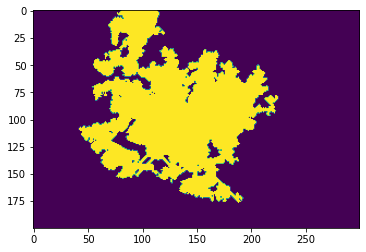

In [118]:
grid_shape = (200, 300)
num_iter = 1000
start_fixing_iter = 100 # Iteration in which the PlanoAstral starts working

conway = GameOfLife(grid_shape)
conway.random_init(0.5)
# plt.imshow(conway.grid)

plano_astral = PlanoAstral()
plano_astral.random_init(50, (90, 110), (140, 160))
# plt.imshow(plano_astral.get_grid(grid_shape))

for i in range(num_iter):
    conway.update()
    if i >= start_fixing_iter:
        plano_astral.update(conway.grid)
plt.imshow(plano_astral.get_grid(grid_shape))

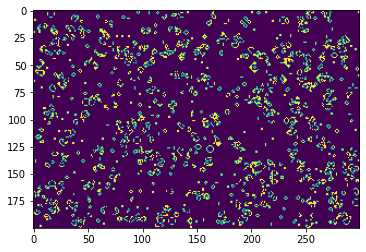

In [116]:
conway.update()
plt.imshow(conway.grid)

MovieWriter ffmpeg unavailable; using Pillow instead.


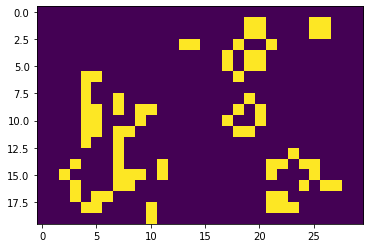

In [51]:
# Animacao
conway = GameOfLife((20,30))
conway.random_init(0.5)

updateInterval = 50
fig, ax = plt.subplots()
img = ax.imshow(conway.grid)
ani = animation.FuncAnimation(fig, update_animation, fargs=(img, conway),
                                frames = 30,
                                interval=updateInterval,
                                save_count=50)

ani.save('tst_conway.gif', fps=30) 
plt.show()

Melhorias:
- Interativo
- Com propagação => Busca pelos quadradinhos adjacentes (talvez seja má ideia, pense em um glider, ele será inserido várias vezes)
- Delimitar áreas que podem ter jogo da vida => o algoritmo da propagação funciona tipo o baldinho
    - Ao invés de fazer isso é melhor só cortar a forma no final para ficar no formato desejado. E desenhar o plano astral inicial de maneira a ficar bacana.
- algoritmo genético que tenta otimizar a condição inicial do jogo da vida ou/e do plano astral inicial. Interessante seria se fosse aplicar o algoritmo de grudação apenas 100 gerações após o início do jogo da vida e deixar rodar por mais umas 50 gerações grudando.
    - Talvez algo como o Neural Cellular Automata? Nem sei se tem haver.
    - Talvez colocar um operador de simetria após a geração da estrutura. Ele também pode ser otimizado.
    - O estado inicial do Plano Astral poderia até ser gerado por uma rede neural que recebe como entrada x,y e um vetor de features que é otimizado, junto com os pesos da rede neural e o operador de simetria.